# Task 1: Verifying theorems

We verified all theorectical results in the paper "Objective Bayesian analysis for the Student-; regression" (O. Fonseca, T. C., R. Ferreira, M. A., & Migon, H. S. (2014). Objective Bayesian analysis for the Student-t regression model. Biometrika, 101(1), 252–252. https://doi.org/10.1093/biomet/asu001) 

# Task 2: Simulation analysis

In [1]:
# Load packages
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import pymc as pm;import arviz as az; 
import math

# Sample size 30

In [ ]:
# Create data with Sample size 30
x1 = stats.norm(loc = 0, scale = 1).rvs(30)
x2 = stats.norm(loc = 0, scale = 1).rvs(30)
x3 = stats.norm(loc = 0, scale = 1).rvs(30)
x4 = stats.norm(loc = 0, scale = 1).rvs(30)

true_XB = 1 + x1*1 + 0.3*x2 + 0.9*x3 + 1*x4
true_nu = 2
hyper_sigma = math.sqrt(1.5)

true_y=stats.t.rvs(df=true_nu, loc=true_XB, scale=hyper_sigma, random_state=None)


## Geweke prior (lam = 0.1)

In [2]:
# Define log probability of sigma prior: pdf = 1/x
def logsig(x):
    return -np.log(x)

In [ ]:
model = pm.Model()
with model:
    # Geweke prior on nu with lamda = 0.1
    nu = pm.Exponential('nu', lam = 0.1) 
    
    # 1/x prior on sigma
    sigma = pm.CustomDist('sigma',logp=logsig, initval = np.sqrt(1.5)) #set initial value so that MAP code can run 
    
    # Flat priors on all betas
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
      
    # Linear combination of betas and x
    mu = pm.Deterministic('mu', intercept + beta_1*x1 + beta_2*x2 + beta_3*x3 + beta_4*x4)

    # T regression likelihood
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 30, observed = true_y)

    idata = pm.sample()

In [ ]:
# Extract MAP 
with model:
    map_est = pm.find_MAP()
print(map_est)

In [ ]:
# Summary of posterior
print("number of MCMC samples:", idata.posterior['nu'].values.flatten().shape[-1])
az.summary(idata.posterior['nu'], round_to=2)

In [ ]:
# Posterior distribution plot
import matplotlib.pyplot as plt
az.plot_trace(idata.posterior['nu'])

## Geweke prior (lam = 1.0)

In [ ]:
model2 = pm.Model()
with model2:
    # Geweke prior on nu with lamda = 1.0
    nu = pm.Exponential('nu', lam = 1.0)
    
    # 1/x prior on sigma
    sigma = pm.CustomDist('sigma',logp=logsig, initval = np.sqrt(1.5)) #set initial value so that MAP code can run
    
    # Flat priors on all betas
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
    
    # Linear combination of betas and x
    mu = pm.Deterministic('mu', intercept + beta_1*x1 + beta_2*x2 + beta_3*x3 + beta_4*x4)

    # T regression likelihood
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 30, observed = true_y)

    idata2 = pm.sample()

In [ ]:
# Extract MAP 
with model2:
    map_est_2 = pm.find_MAP()
print(map_est_2)

In [ ]:
# Summary of posterior
print("number of MCMC samples:", idata2.posterior['nu'].values.flatten().shape[-1])
az.summary(idata2.posterior['nu'], round_to=2)

In [ ]:
# Posterior distribution plot
az.plot_trace(idata2.posterior['nu'])

# Sample size 100

In [3]:
# Create data with Sample size 100
X1 = stats.norm(loc = 0, scale = 1).rvs(100)
X2 = stats.norm(loc = 0, scale = 1).rvs(100)
X3 = stats.norm(loc = 0, scale = 1).rvs(100)
X4 = stats.norm(loc = 0, scale = 1).rvs(100)

true_XB_2 = 1 + X1*1 + 0.3*X2 + 0.9*X3 + 1*X4
true_nu_2 = 2
hyper_sigma_2 = math.sqrt(1.5)

true_y_2= stats.t.rvs(df=true_nu_2, loc=true_XB_2, scale=hyper_sigma_2, random_state=None)

## Geweke prior (lam = 0.1)

In [1]:
# Define log probability of sigma prior: pdf = 1/x
def logsig(x):
    return -np.log(x)

In [4]:
model_100 = pm.Model()

with model_100:
    # Geweke prior on nu with lamda = 0.1
    nu = pm.Exponential('nu', lam = 0.1)
    
    # 1/x prior on sigma
    sigma = pm.CustomDist('sigma',logp=logsig, initval = np.sqrt(1.5)) #set initial value so that MAP code can run
    
    # Flat priors on all betas
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
    
    # Linear combination of betas and x
    mu = pm.Deterministic('mu', intercept + beta_1*X1 + beta_2*X2 + beta_3*X3 + beta_4*X4)

    # T regression likelihood
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 100, observed = true_y_2)

    idata_100 = pm.sample()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, intercept, beta_1, beta_2, beta_3, beta_4]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [7]:
# Extract MAP 
with model_100:
    map_est_100 = pm.find_MAP()
print(map_est_100)


{'nu_log__': array(0.7951838), 'sigma': array(1.2316259), 'intercept': array(1.06801454), 'beta_1': array(0.72235728), 'beta_2': array(0.1912417), 'beta_3': array(0.77022901), 'beta_4': array(0.85337131), 'nu': array(2.21484806), 'mu': array([ 1.40144723, -3.32199779,  1.39506134,  0.19379155, -0.47269059,
        1.29099188,  2.21928115,  1.1312217 ,  1.47612934,  0.50331105,
        0.24227143,  0.10490536, -0.64688386,  2.46410762,  0.79720228,
        0.96085016,  1.83536075,  1.71814309,  0.22513542,  3.47879977,
       -0.46098569,  1.44318979,  2.24171154,  1.912476  ,  1.25721547,
        2.70569967,  1.31208856,  3.48460468, -0.29993268,  0.78112599,
        2.64121797,  1.37694719,  1.32997841,  1.94670293,  1.30578395,
        1.18258672,  0.04078253,  2.01446063,  1.94894113,  3.65505312,
       -1.75823441, -0.88361017,  0.75182769, -1.62202388, -0.45436586,
        1.78336485,  1.08469052, -0.22389975, -0.73457394,  2.65401449,
       -1.10688915,  1.05548972,  2.1669820

In [5]:
# Summary of posterior
print("number of MCMC samples:", idata_100.posterior['nu'].values.flatten().shape[-1])
az.summary(idata_100.posterior['nu'], round_to=2)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
nu,3.0,1.17,1.29,4.84,0.02,0.02,3587.16,2898.85,1.0


array([[<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

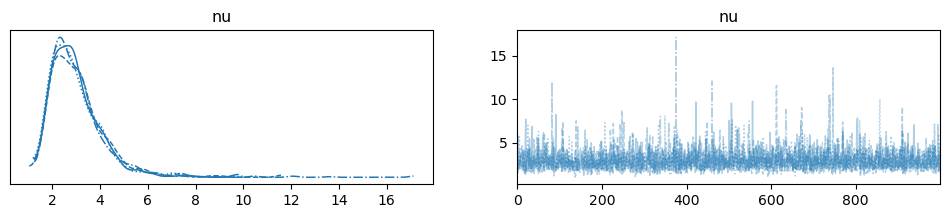

In [6]:
# Posterior distribution plot
az.plot_trace(idata_100.posterior['nu'])

## Geweke prior (lam = 1.0)

In [8]:
model2_100 = pm.Model()

with model2_100:    
    # Geweke prior on nu with lamda = 1.0
    nu = pm.Exponential('nu', lam = 1.0)
    
    # 1/x prior on sigma
    sigma = pm.CustomDist('sigma',logp=logsig, initval = np.sqrt(1.5)) #set initial value so that MAP code can run
    
    # Flat priors on all betas
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
    
    # Linear combination of betas and x
    mu = pm.Deterministic('mu', intercept + beta_1*X1 + beta_2*X2 + beta_3*X3 + beta_4*X4)

    # T regression likelihood
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 100, observed = true_y_2)

    idata2_100 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, intercept, beta_1, beta_2, beta_3, beta_4]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [11]:
# Extract MAP 
with model2_100:
    map_est_2_100 = pm.find_MAP()
print(map_est_2_100)


{'nu_log__': array(0.6589772), 'sigma': array(1.17545071), 'intercept': array(1.07526358), 'beta_1': array(0.70829141), 'beta_2': array(0.17788482), 'beta_3': array(0.78116045), 'beta_4': array(0.84866275), 'nu': array(1.93281445), 'mu': array([ 1.4149404 , -3.3014279 ,  1.37574022,  0.22235375, -0.49078991,
        1.33625569,  2.20222717,  1.1251817 ,  1.47727492,  0.52471734,
        0.25916968,  0.13953388, -0.62562294,  2.48945087,  0.82469229,
        0.97622006,  1.83926858,  1.7315136 ,  0.24492908,  3.4890674 ,
       -0.44425323,  1.41578271,  2.23554816,  1.91475448,  1.2539639 ,
        2.71406142,  1.3035415 ,  3.50510155, -0.30980456,  0.79209467,
        2.62231463,  1.3840428 ,  1.31555844,  1.9567941 ,  1.28898652,
        1.1973963 ,  0.07586246,  2.01652229,  1.9357581 ,  3.65160695,
       -1.71358232, -0.89605499,  0.7343588 , -1.60340468, -0.45002202,
        1.81564825,  1.09445845, -0.22197597, -0.72244305,  2.65429492,
       -1.14048388,  1.05317159,  2.18597

In [9]:
# Summary of posterior
print("number of MCMC samples:", idata2_100.posterior['nu'].values.flatten().shape[-1])
az.summary(idata2_100.posterior['nu'], round_to=2)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
nu,2.33,0.64,1.27,3.49,0.01,0.01,3913.34,3380.87,1.0


array([[<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

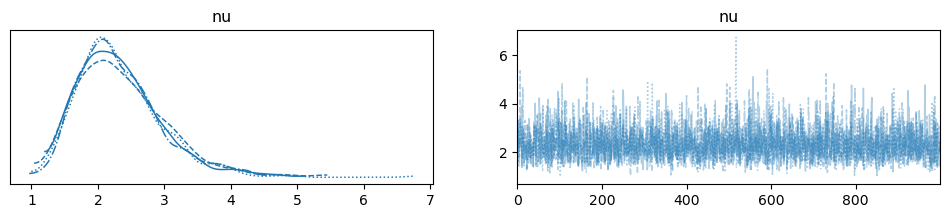

In [10]:
# Posterior distribution plot
az.plot_trace(idata2_100.posterior['nu'])

## Jeffreys prior

In [12]:
# Load package
import pytensor.tensor as pt
# Trigamma function: pt.polygamma(1, psi)

In [13]:
# log probability of Jeffreys prior 
def logJeff(x):
    return pt.log((x/(x+3))**(1/2)*(pt.polygamma(1,x/2) - pt.polygamma(1, (x+1)/2) - 2*(x+3)/(x*(x+1)**2))**(1/2))

In [15]:
modelJeff = pm.Model()

with modelJeff:
    # Jeffrey prior on nu
    nu = pm.CustomDist('nu', logp=logJeff, initval = 2) #set initial value so that MAP code can run
    
    # 1/x prior on sigma
    sigma = pm.CustomDist('sigma',logp=logsig, initval = np.sqrt(1.5)) #set initial value so that MAP code can run
    
    # Flat priors on all betas
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
    
    # Linear combination of betas and x
    mu = pm.Deterministic('mu', intercept + beta_1*X1 + beta_2*X2 + beta_3*X3 + beta_4*X4)

    # T regression likelihood
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 100, observed = true_y_2)

    idataJeff = pm.sample()

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op polygamma does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op polygamma does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, intercept, beta_1, beta_2, beta_3, beta_4]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [18]:
# Extract MAP 
with modelJeff:
    est_jeff_map = pm.find_MAP()
print(est_jeff_map)

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op polygamma does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(



{'nu': array(2.02436723), 'sigma': array(1.19458216), 'intercept': array(1.07263607), 'beta_1': array(0.71289797), 'beta_2': array(0.18239931), 'beta_3': array(0.77719431), 'beta_4': array(0.85008426), 'mu': array([ 1.41009237, -3.30751468,  1.38208723,  0.21260774, -0.48436642,
        1.32050888,  2.207535  ,  1.12713357,  1.4765936 ,  0.51740292,
        0.25342195,  0.12781229, -0.63262884,  2.48021865,  0.81522003,
        0.97085871,  1.83759157,  1.72668369,  0.23817184,  3.48476513,
       -0.44972929,  1.42488819,  2.23719717,  1.91368962,  1.25482328,
        2.71062869,  1.30627495,  3.49736373, -0.30624304,  0.78835648,
        2.62821289,  1.38144921,  1.32030033,  1.95295926,  1.29451566,
        1.19213251,  0.06390582,  2.01544319,  1.93992904,  3.65195923,
       -1.72827951, -0.89130628,  0.74028301, -1.60926365, -0.45125246,
        1.80428086,  1.09097962, -0.22244521, -0.72628199,  2.65362175,
       -1.12849395,  1.05381474,  2.17900579,  1.94338348,  0.48211856,

In [17]:
# Summary of posterior
print("number of MCMC samples:", idataJeff.posterior['nu'].values.flatten().shape[-1])
az.summary(idataJeff.posterior['nu'], round_to=2)

number of MCMC samples: 4000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
nu,2.63,0.92,1.4,4.25,0.03,0.02,1998.41,1362.83,1.0


array([[<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

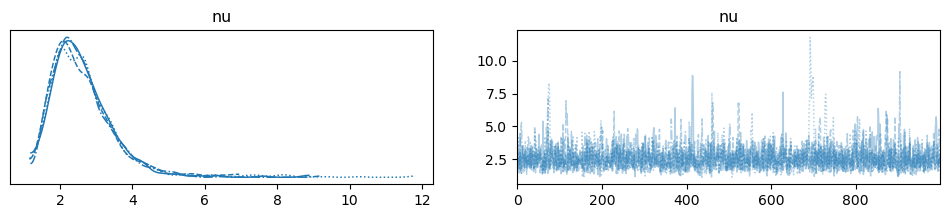

In [16]:
# Posterior distribution plot
az.plot_trace(idataJeff.posterior['nu'])

By changing the true nu values, we found that Jeffrey's prior always perform in between of Geweke 0.1 and Geweke 1.0, which is consistent to the results found in Section 4 in the paper. As for the hyperparameter in Geweke prior (i.e. lamda), there performance depends on the true nu.

We also checked that the initial value set in nu and sigma (for the purpose of smooth running MAP function) does not affect the posterior results, they are used to avoid giving 0 which creates problem in integration. Note that without any initial values, summary function and posterior distribution function can still run.

In [ ]:
modelJeff_no_init = pm.Model()

with modelJeff_no_init:
    nu = pm.CustomDist('nu', logp=logJeff, initval = 1)
    
    sigma = pm.CustomDist('sigma',logp=logsig, initval = 0.01)
    
    intercept = pm.Flat('intercept')
    beta_1 = pm.Flat('beta_1')
    beta_2 = pm.Flat('beta_2')
    beta_3 = pm.Flat('beta_3')
    beta_4 = pm.Flat('beta_4')
    
    
    mu = pm.Deterministic('mu', intercept + beta_1*X1 + beta_2*X2 + beta_3*X3 + beta_4*X4)

    ### Changed to a T distribution ###
    y = pm.StudentT('y', nu = nu, mu = mu, sigma = sigma, shape = 100, observed = true_y_2)

    idataJeff_no_init = pm.sample()

In [ ]:
with modelJeff_no_init:
    est_jeff_map_no_init = pm.find_MAP()
print(est_jeff_map_no_init)

MAP function doesn't work only because of 0 in the denominator.